## Import libraries

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

## Load Dataset

In [85]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 20

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
        "../PlantVillage",
        shuffle=True,
        image_size = (IMAGE_SIZE, IMAGE_SIZE),
        batch_size = BATCH_SIZE
    )

Found 2152 files belonging to 3 classes.


In [7]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
len(dataset)

68

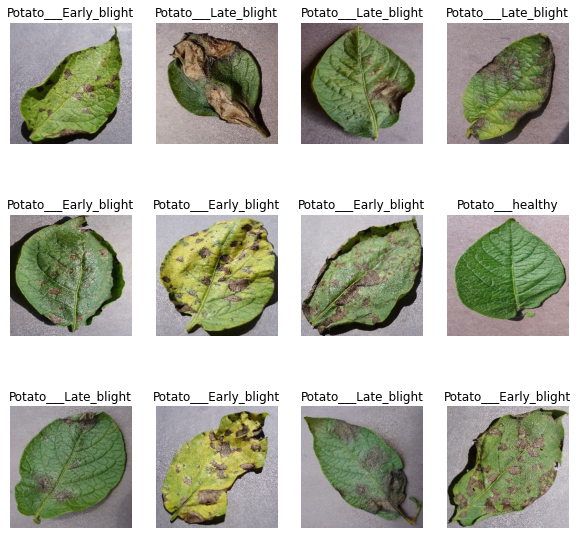

In [23]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.axis('off')
        plt.title(class_names[label_batch[i]])
        #print(image_batch[0].shape)

## Split the data

In [ ]:
# 80% => training
# 10% => validation
# 10% => test

In [44]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    test_size = int(test_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [45]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [46]:
len(train_ds)

54

In [47]:
len(val_ds)

6

In [49]:
len(test_ds)

8

In [50]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

## Scale the data

In [53]:
# resize the image for the future and recale the pixels to be between 0 and 1
resize_and_recale = tf.keras.Sequential([
        layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
        layers.experimental.preprocessing.Rescaling(1.0/255)
    ])

## Data Augmentation  

In [76]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [77]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

NotImplementedError: in user code:

    C:\Users\Khaliladib\AppData\Local\Temp\ipykernel_8748\3649824265.py:2 None  *
        lambda x, y: (data_augmentation(x, training=True), y)
    C:\Users\Khaliladib\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1030 __call__  **
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\Khaliladib\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\sequential.py:394 call
        outputs = layer(inputs, **kwargs)
    C:\Users\Khaliladib\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1030 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\Khaliladib\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\layers\preprocessing\image_preprocessing.py:827 call
        output = control_flow_util.smart_cond(training, random_rotated_inputs,
    C:\Users\Khaliladib\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\utils\control_flow_util.py:109 smart_cond
        return smart_module.smart_cond(
    C:\Users\Khaliladib\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\smart_cond.py:54 smart_cond
        return true_fn()
    C:\Users\Khaliladib\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\layers\preprocessing\image_preprocessing.py:822 random_rotated_inputs
        get_rotation_matrix(angles, img_hd, img_wd),
    C:\Users\Khaliladib\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\layers\preprocessing\image_preprocessing.py:729 get_rotation_matrix
        array_ops.zeros((num_angles, 2), dtypes.float32),
    C:\Users\Khaliladib\anaconda3\envs\tf\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\Khaliladib\anaconda3\envs\tf\lib\site-packages\tensorflow\python\ops\array_ops.py:2911 wrapped
        tensor = fun(*args, **kwargs)
    C:\Users\Khaliladib\anaconda3\envs\tf\lib\site-packages\tensorflow\python\ops\array_ops.py:2960 zeros
        output = _constant_if_small(zero, shape, dtype, name)
    C:\Users\Khaliladib\anaconda3\envs\tf\lib\site-packages\tensorflow\python\ops\array_ops.py:2896 _constant_if_small
        if np.prod(shape) < 1000:
    <__array_function__ internals>:5 prod
        
    C:\Users\Khaliladib\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3051 prod
        return _wrapreduction(a, np.multiply, 'prod', axis, dtype, out,
    C:\Users\Khaliladib\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:86 _wrapreduction
        return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
    C:\Users\Khaliladib\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\ops.py:867 __array__
        raise NotImplementedError(

    NotImplementedError: Cannot convert a symbolic Tensor (sequential_7/random_rotation_1/rotation_matrix/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported


Data augmentation error, numpy version > 1.20 is not compatible with Tensorflow...

In [75]:
import numpy
numpy.version.version

'1.21.2'

## Build the Model 

In [78]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

In [79]:
model = models.Sequential([
    resize_and_recale,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation = 'softmax')
])

In [80]:
model.build(input_shape=input_shape)

In [82]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      multiple                  0         
_________________________________________________________________
conv2d_31 (Conv2D)           (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_33 (Conv2D)           (32, 60, 60, 64)          36928     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (32, 30, 30, 64)         

In [83]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [86]:
history = model.fit(
        train_ds,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        verbose=1,
        validation_data=val_ds,
    )

Epoch 1/20
54/54 [==============================] - 26s 470ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0126 - val_accuracy: 0.9948
Epoch 2/20
54/54 [==============================] - 25s 470ms/step - loss: 4.7626e-04 - accuracy: 1.0000 - val_loss: 0.0081 - val_accuracy: 0.9948
Epoch 3/20
54/54 [==============================] - 25s 468ms/step - loss: 2.5602e-04 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 0.9948
Epoch 4/20
54/54 [==============================] - 25s 466ms/step - loss: 1.9247e-04 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 0.9948
Epoch 5/20
54/54 [==============================] - 25s 469ms/step - loss: 1.5982e-04 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 0.9948
Epoch 6/20
54/54 [==============================] - 25s 468ms/step - loss: 1.3042e-04 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 0.9948
Epoch 7/20
54/54 [==============================] - 25s 467ms/step - loss: 1.1331e-04 - accuracy: 1.0000 - val_loss: 0.004

## Check Accuracy

In [88]:
score = model.evaluate(test_ds)

8/8 [==============================] - 2s 178ms/step - loss: 0.0060 - accuracy: 0.9961


In [89]:
score

[0.006044915411621332, 0.99609375]

In [90]:
history

In [91]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 54}

In [92]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [97]:
history.history['val_accuracy']

[0.9947916865348816,
 0.9947916865348816,
 0.9947916865348816,
 0.9947916865348816,
 0.9947916865348816,
 0.9947916865348816,
 0.9947916865348816,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [98]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

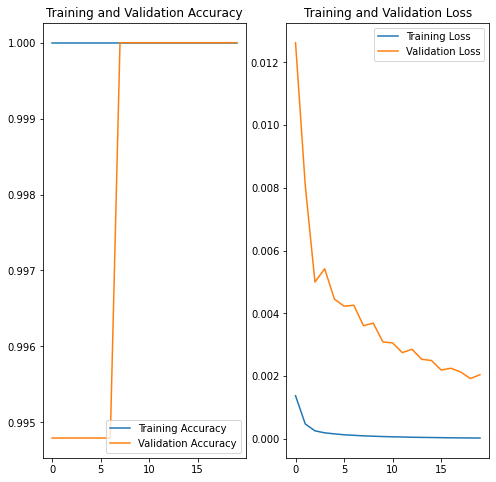

In [100]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Predict

Actual label: Potato___Late_blight
Predicted label: Potato___Late_blight


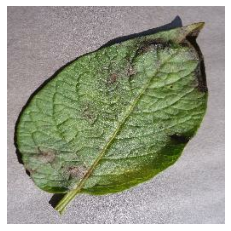

In [108]:
import numpy as np

for images_batch , labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    plt.axis('off')
    
    plt.imshow(first_image)
    print(f'Actual label: {class_names[first_label]}')
    
    batch_prediction = model.predict(images_batch)
    
    print(f'Predicted label: {class_names[np.argmax(batch_prediction[0])]}')

In [111]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

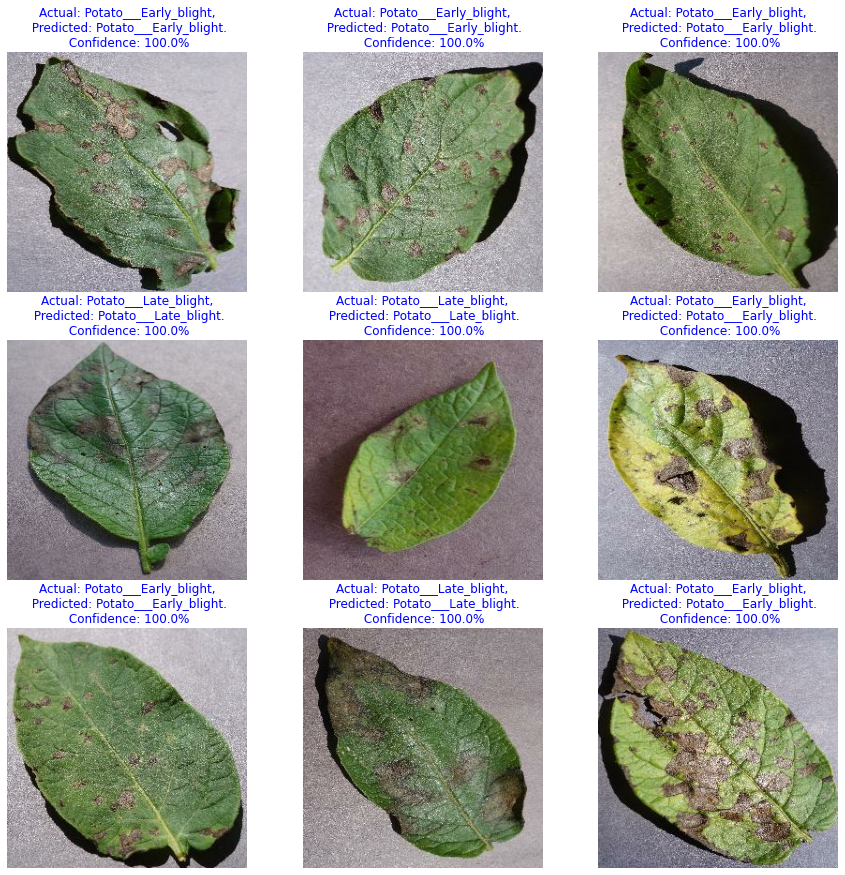

In [115]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        color = ''
        if actual_class == predicted_class:
            color = 'b'
        else:
            color = 'r'
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%", c=color)
        
        plt.axis("off")

## Save the model

In [131]:
import os
model_version = '1'
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets


In [132]:
model.save("../potatoes.h5")